# MODELLING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data in DANA

In [1]:
# Import all libraries that will used for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [23]:
from platform import python_version
import sklearn
print("pd: ", pd.__version__)
print("np: ", np.__version__)
print("sns: ", sns.__version__)
print("tf: ", tf.__version__)
print("python: ", python_version())
print("sklearn: ", sklearn.__version__)

pd:  1.1.5
np:  1.19.5
sns:  0.11.2
tf:  2.2.0
python:  3.6.13
sklearn:  0.24.2


In [2]:
# Read dataset
df = pd.read_csv("user_data_clip99_minmax.csv", sep=';')

In [3]:
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns = ['uid', 'id'])
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_Male,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
0,0,0.784107,0.714822,0.782440,0.000000,1,0.097656,0.343195,0.171118,0.138889,...,1,0,0,0,0,0,0,0,0,1
1,1,0.772855,0.704503,0.566964,0.013855,1,0.128906,0.144773,0.379822,0.203704,...,0,0,0,0,0,0,0,0,0,1
2,1,0.448664,0.269231,0.783333,0.014068,1,0.105469,0.118935,0.067260,0.011574,...,0,0,1,0,0,0,0,0,0,0
3,1,0.913502,0.884615,0.999405,0.026893,1,0.000000,0.000000,0.012859,0.013889,...,1,0,1,0,0,0,0,0,0,0
4,1,0.870605,0.827392,0.893155,0.053004,1,0.000000,0.000000,0.064293,0.060185,...,1,0,1,0,0,0,0,0,0,0


In [31]:
df.loc[(df['is_scammer'] == 1)]['source_CS_REPORT_VICTIM'].value_counts()

0    21139
Name: source_CS_REPORT_VICTIM, dtype: int64

In [32]:
df.loc[(df['is_scammer'] == 1)]['source_INCOMPLETE_CS_REPORT_VICTIM'].value_counts()

0    21139
Name: source_INCOMPLETE_CS_REPORT_VICTIM, dtype: int64

In [33]:
df.loc[(df['is_scammer'] == 1)]['source_INCOMPLETE_CS_REPORT_SCAMMER'].value_counts()

0    12577
1     8562
Name: source_INCOMPLETE_CS_REPORT_SCAMMER, dtype: int64

In [34]:
df.loc[(df['is_scammer'] == 1)]['source_CS_REPORT_SCAMMER'].value_counts()

1    12577
0     8562
Name: source_CS_REPORT_SCAMMER, dtype: int64

## Logistic Regression Model

In [4]:
# Split Train and Validation Dataset
#from sklearn.model_selection import train_test_split
# SPLIT_SIZE = 0.9

# train_len = int(len(df) * SPLIT_SIZE)

# shuffled_files = df.sample(frac = 1, random_state = 1)

# test_set = shuffled_files[train_len:]
# train_set = shuffled_files[:train_len]

# y_train = train_set['is_scammer']
# x_train = train_set.drop(columns=['is_scammer'])
# y_test = test_set['is_scammer']
# x_test = test_set.drop(columns=['is_scammer'])

In [5]:
# x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
# x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

## K-Nearest Neighbors Algorithm Method

In [6]:
# train_set: x 
# test_set: y
# y_train = train_set['is_scammer']
# x_train = train_set.drop(columns=['is_scammer'])
train_set2 = df.drop(columns =['is_scammer'])
test_set2 = df['is_scammer']
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_set2, test_set2, test_size = 0.0526, random_state = 0)

In [7]:
# Feature Scaling
std_scaler = StandardScaler()
x_train2 = std_scaler.fit_transform(x_train2)
x_test2 = std_scaler.fit_transform(x_test2)

In [8]:
# Fitting KNN classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train2, y_train2)

KNeighborsClassifier()

In [9]:
#Predicting the test set result
y_pred_train2 = classifier.predict(x_train2)
y_pred_test2 = classifier.predict(x_test2)

In [10]:
#Creating the Confusion matrix  
con_matrix_train = confusion_matrix(y_train2, y_pred_train2)  
con_matrix_test = confusion_matrix(y_test2, y_pred_test2)

print('Confusion Matrix: Training')
con_matrix_train
print('\nConfusion Matrix: Testing')
con_matrix_test

Confusion Matrix: Training

Confusion Matrix: Testing


array([[5333,   41],
       [  82, 5259]], dtype=int64)

In [11]:
def predict_class(y_pred, thresh=0.5):
    # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
    return tf.cast(y_pred > thresh, tf.float32)

def show_confusion_matrix2(y, y_classes, typ):
    # Compute the confusion matrix and normalize it
    plt.figure(figsize=(10,10))
    confusion = metrics.confusion_matrix(y.to_numpy(), y_classes.numpy())
    confusion_normalized = confusion / confusion.sum(axis=1)
    axis_labels = range(2)
    ax = sns.heatmap(
        confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
        cmap='Blues', annot=True, fmt='.4f', square=True)
    plt.title(f"Confusion matrix: {typ}")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

train_classes2, test_classes2 = predict_class(y_pred_train2), predict_class(y_pred_test2)

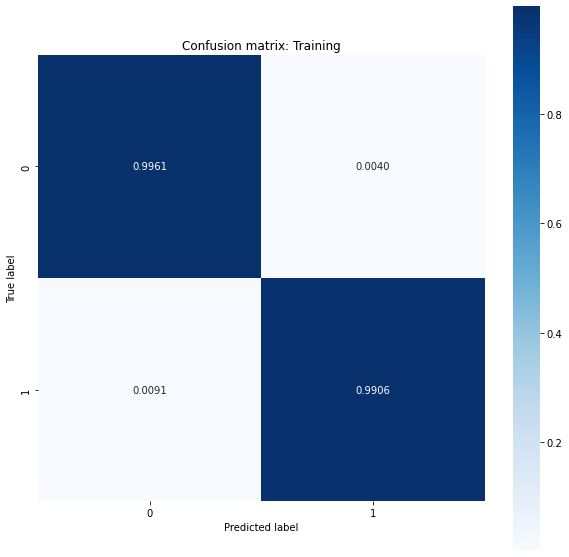

In [12]:
show_confusion_matrix2(y_train2, train_classes2, 'Training')

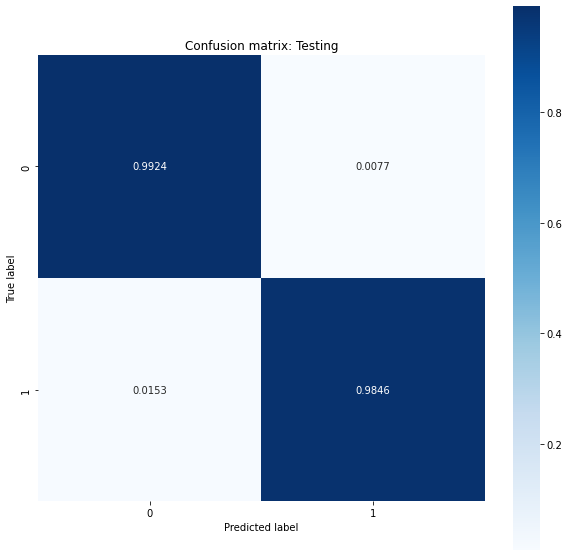

In [13]:
show_confusion_matrix2(y_test2, test_classes2, 'Testing')

source: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning